In [1]:
import pandas
import numpy as np
import sys
import zipfile, os, time
import urllib3
import datetime
import glob
import plotly.express as px
fs = open('path.txt', 'r')
path = fs.read()  
fs.close()
sys.path.append(path)

import cds_eua3 as eua
eua.logging_set_level(30)
import xarray as xr

import matplotlib.pyplot as plt


import cdsapi, zipfile, os, time

# Please note: Server URL will be omitted, once published
c = cdsapi.Client(url='https://sis-dev.climate.copernicus.eu/api/v2')



In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

---

# Analyzing and comparing temperature values for IGRA (and its harmonized version) and Comprehensive upper-air observation network (COMP)

---

## IGRA

In [3]:
files = glob.glob('IGRA_11035/*/*.csv')
files_h = glob.glob('IGRA_H_11035/*/*.csv')
print(len(files) == len(files_h))

True


In [4]:
for i in range(len(files)):
    if i == 0:
        igra = pandas.read_csv(files[i], header=12)
        igrah = pandas.read_csv(files_h[i], header=12)
    else:
        igra = igra.append(pandas.read_csv(files[i], header=12))
        igrah = igrah.append(pandas.read_csv(files_h[i], header=12))

In [5]:
igrah

,station_name,report_timestamp,report_id,longitude,latitude,height_of_station_above_sea_level,air_pressure,air_temperature,relative_humidity,actual_time
0,AUM00011035,1978-01-01 00:00:00+00,9461629,16.3564,48.2486,200,7000,214.08,NaN,1978-01-01 00:00:00+00
1,AUM00011035,1978-01-01 00:00:00+00,9461629,16.3564,48.2486,200,79500,261.53,58.33,1978-01-01 00:00:00+00
2,AUM00011035,1978-01-01 00:00:00+00,9461629,16.3564,48.2486,200,5000,205.75,NaN,1978-01-01 00:00:00+00
3,AUM00011035,1978-01-01 00:00:00+00,9461629,16.3564,48.2486,200,10000,213.83,NaN,1978-01-01 00:00:00+00
4,AUM00011035,1978-01-01 00:00:00+00,9461629,16.3564,48.2486,200,16200,225.48,21.54,1978-01-01 00:00:00+00
...,...,...,...,...,...,...,...,...,...,...
26470,AUM00011035,2018-09-30 12:00:00+00,9441360,16.3564,48.2486,200,99700,287.95,41.34,2018-09-30 11:30:00+00
26471,AUM00011035,2018-09-30 12:00:00+00,9441360,16.3564,48.2486,200,14100,208.25,8.54,2018-09-30 11:30:00+00
26472,AUM00011035,2018-09-30 12:00:00+00,9441360,16.3564,48.2486,200,27800,228.25,19.73,2018-09-30 11:30:00+00
26473,AUM00011035,2018-09-30 12:00:00+00,9441360,16.3564,48.2486,200,16700,204.25,49.31,2018-09-30 11:30:00+00


In [6]:
pltn = igra[igra.air_pressure == 50000]
plth = igrah[igrah.air_pressure == 50000]


2020-10-14 14:46:56,815 INFO Note: NumExpr detected 56 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-10-14 14:46:56,816 INFO NumExpr defaulting to 8 threads.


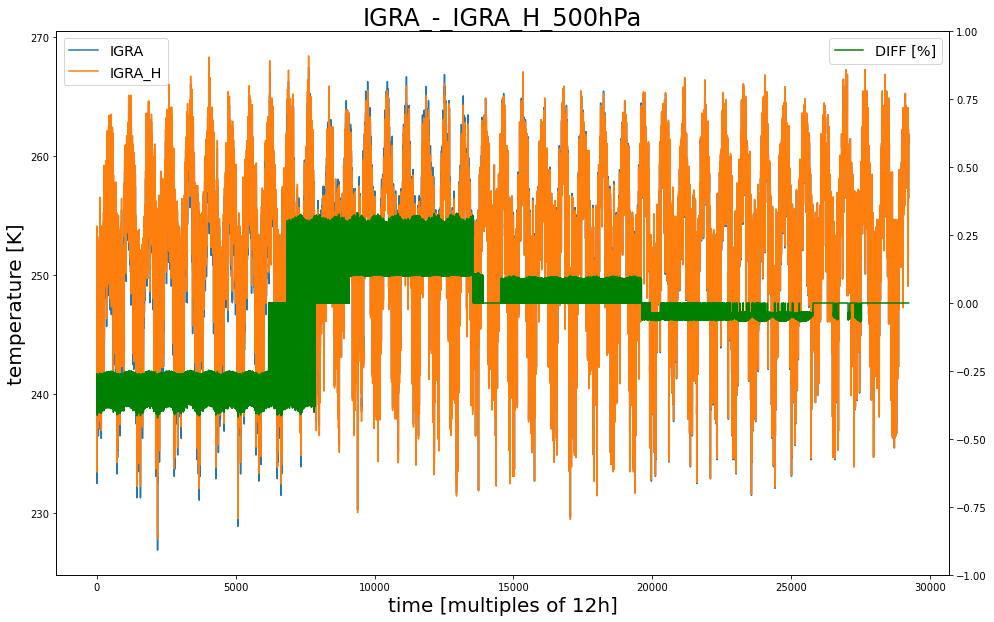

In [7]:
fig, (ax1) = plt.subplots(1, 1)

ax1.plot(np.asarray(range(len(pltn.report_timestamp))), np.asarray(pltn.air_temperature), label = 'IGRA')
ax1.plot(np.asarray(range(len(pltn.report_timestamp))), np.asarray(plth.air_temperature), label = 'IGRA_H')
ax2 = ax1.twinx()
ax2.plot(np.asarray(range(len(pltn.report_timestamp))), (100. / np.asarray(pltn.air_temperature) * (np.asarray(pltn.air_temperature)-np.asarray(plth.air_temperature))), label = 'DIFF [%]', c='green')

ax2.set_ylim(-1,1)
ax2.legend(loc='best')

ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_-_IGRA_H_500hPa')
ax1.legend( loc='upper left')
plt.show()
plt.close(fig)

In [8]:
plth_1990 = plth[plth.report_timestamp.str[:4] == '1990']
pltn_1990 = pltn[pltn.report_timestamp.str[:4] == '1990']


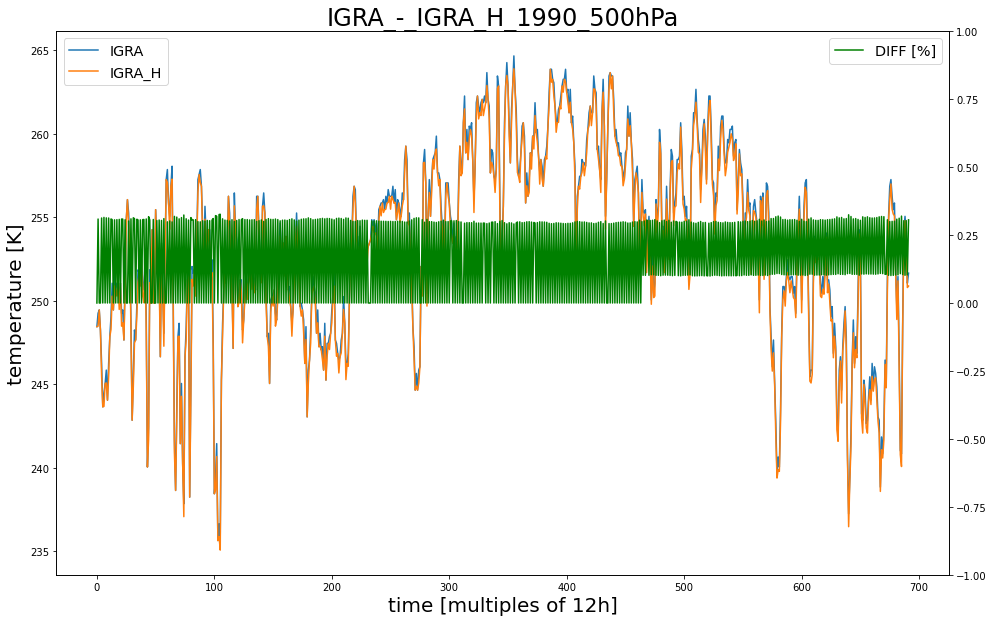

In [9]:
fig, (ax1) = plt.subplots(1, 1)

ax1.plot(np.asarray(range(len(pltn_1990.report_timestamp))), np.asarray(pltn_1990.air_temperature), label = 'IGRA')
ax1.plot(np.asarray(range(len(pltn_1990.report_timestamp))), np.asarray(plth_1990.air_temperature), label = 'IGRA_H')
ax2 = ax1.twinx()
ax2.plot(np.asarray(range(len(pltn_1990.report_timestamp))), (100. / np.asarray(pltn_1990.air_temperature) * (np.asarray(pltn_1990.air_temperature)-np.asarray(plth_1990.air_temperature))), label = 'DIFF [%]', c='green')
ax2.set_ylim(-1,1)
ax2.legend(loc='best')

ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_-_IGRA_H_1990_500hPa')
ax1.legend( loc='upper left')
plt.show()
plt.close(fig)

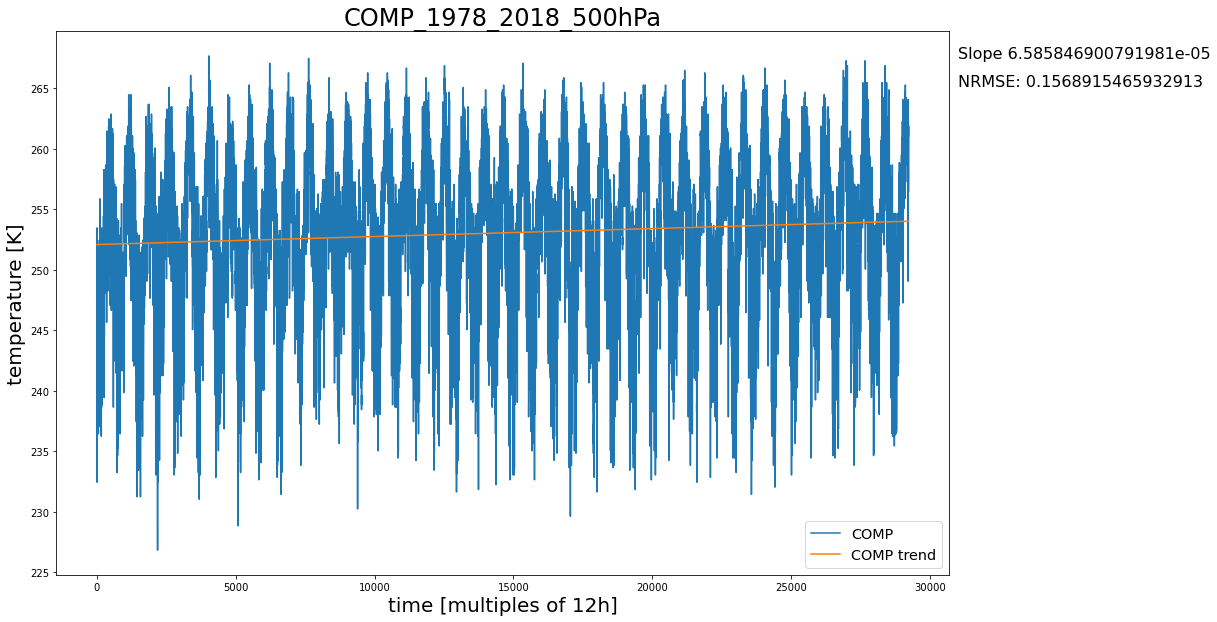

In [10]:
datlen = len(pltn.report_timestamp)
selected = pltn.air_temperature

coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
mse = residuals[0]/(datlen)
nrmse = np.sqrt(mse)/(selected.max() - selected.min())

fig, (ax1) = plt.subplots(1, 1)
ax1.plot(np.asarray(range(datlen)), np.asarray(selected), label = 'COMP')
ax1.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP_1978_2018_500hPa')
ax1.text(1.01, 0.95, 'Slope ' + str(coefficients[0]), transform=ax1.transAxes, fontsize = 16)
ax1.text(1.01, 0.90, 'NRMSE: ' + str(nrmse), transform=ax1.transAxes, fontsize = 16)
ax1.legend( loc='best')
plt.show()
plt.close(fig)

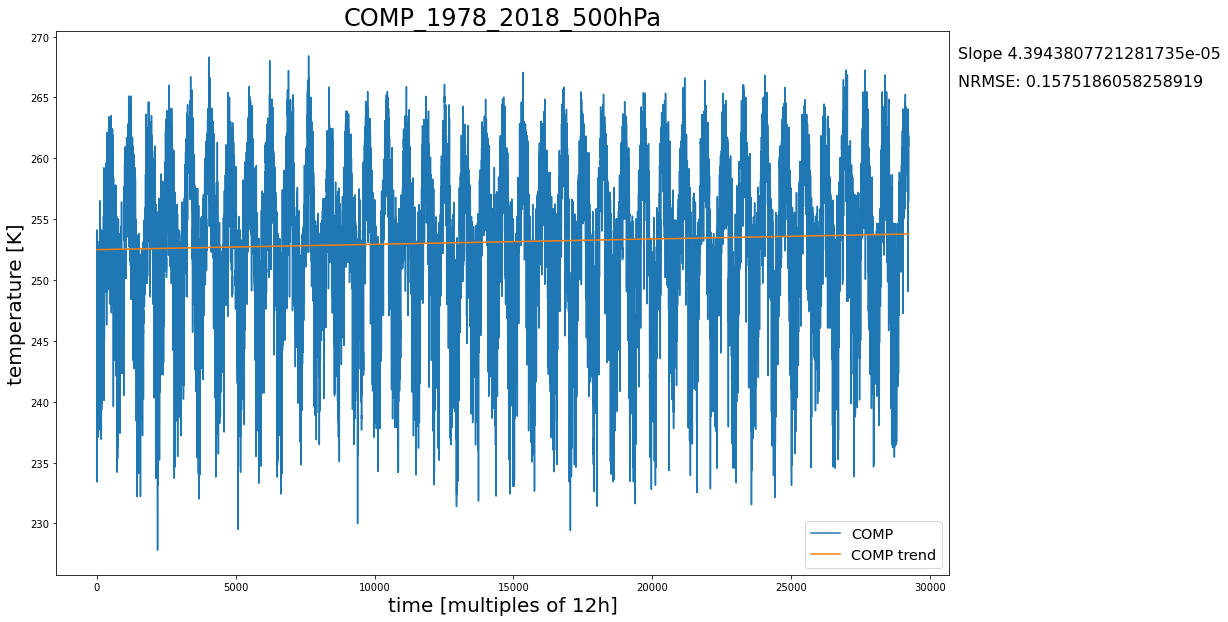

In [11]:
datlen = len(plth.report_timestamp)
selected = plth.air_temperature

coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
mse = residuals[0]/(datlen)
nrmse = np.sqrt(mse)/(selected.max() - selected.min())

fig, (ax1) = plt.subplots(1, 1)
ax1.plot(np.asarray(range(datlen)), np.asarray(selected), label = 'COMP')
ax1.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP_1978_2018_500hPa')
ax1.text(1.01, 0.95, 'Slope ' + str(coefficients[0]), transform=ax1.transAxes, fontsize = 16)
ax1.text(1.01, 0.90, 'NRMSE: ' + str(nrmse), transform=ax1.transAxes, fontsize = 16)
ax1.legend( loc='best')
plt.show()
plt.close(fig)

---

## COMP

In [12]:
data_comp = eua.vm_request_wrapper({'statid':'11035', 'variable': ['temperature', 'relative_humidity']})
first = True
for i in data_comp:
    if(first): 
        comp = data_comp[i].to_dataframe()
        first = False
    else: comp = pandas.merge(comp, data_comp[i].to_dataframe(), how='outer')
comp = comp[comp.time.dt.year > 1977]
comp = comp[comp.time < '2018-10']

2020-10-14 14:46:59,249 DEBUG Extracting ./dest_0-20000-0-11035_air_temperature.nc
2020-10-14 14:46:59,250 DEBUG Extracting ./dest_0-20000-0-11035_relative_humidity.nc
2020-10-14 14:46:59,251 DEBUG [OPEN] ./dest_0-20000-0-11035_air_temperature.nc
2020-10-14 14:46:59,259 DEBUG [OPEN] ./dest_0-20000-0-11035_relative_humidity.nc
2020-10-14 14:46:59,265 INFO Reading Profile on slice(None, None, None)
2020-10-14 14:46:59,603 DEBUG Read variables: dict_keys(['lat', 'lon', 'obs', 'plev', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])
2020-10-14 14:47:00,543 INFO Reading Profile on slice(None, None, None)
2020-10-14 14:47:00,812 DEBUG Read variables: dict_keys(['hur', 'lat', 'lon', 'obs', 'plev', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


In [13]:
pltc = comp[comp.plev == 50000]

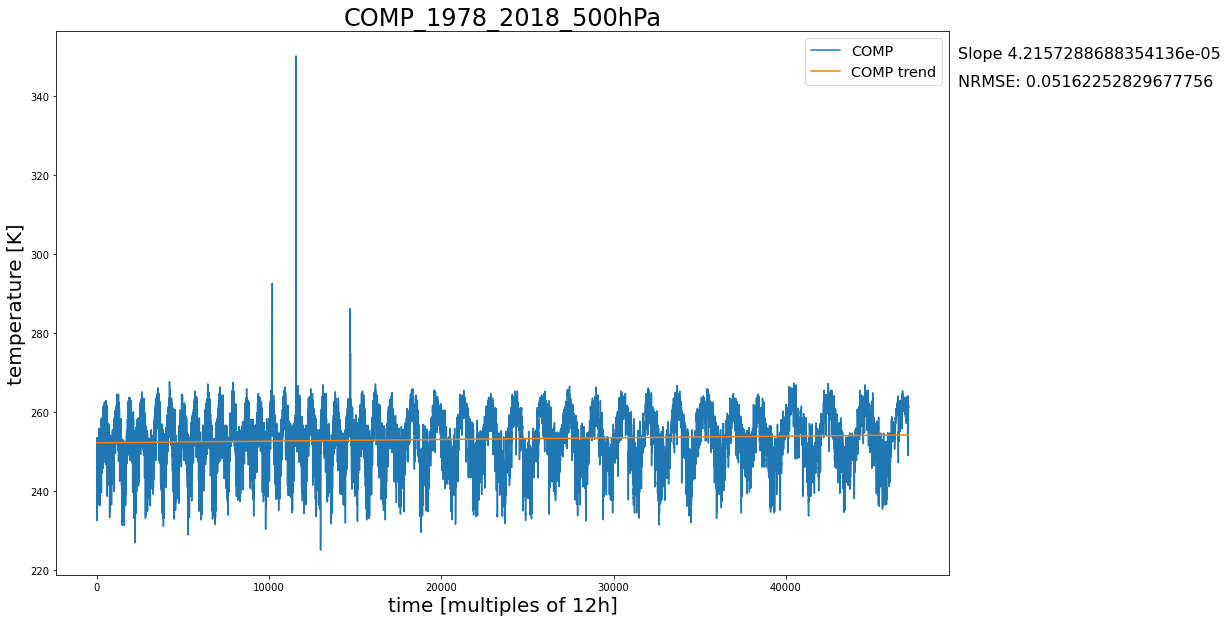

In [14]:
datlen = len(pltc.time)
selected = pltc.ta

coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
mse = residuals[0]/(datlen)
nrmse = np.sqrt(mse)/(selected.max() - selected.min())

fig, (ax1) = plt.subplots(1, 1)
ax1.plot(np.asarray(range(datlen)), np.asarray(selected), label = 'COMP')
ax1.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP_1978_2018_500hPa')
ax1.text(1.01, 0.95, 'Slope ' + str(coefficients[0]), transform=ax1.transAxes, fontsize = 16)
ax1.text(1.01, 0.90, 'NRMSE: ' + str(nrmse), transform=ax1.transAxes, fontsize = 16)
ax1.legend( loc='best')
plt.show()
plt.close(fig)

### does not only have values at 00:00 and 12:00
### the following plot showes a reduced dataset, where only those two times are accepted:

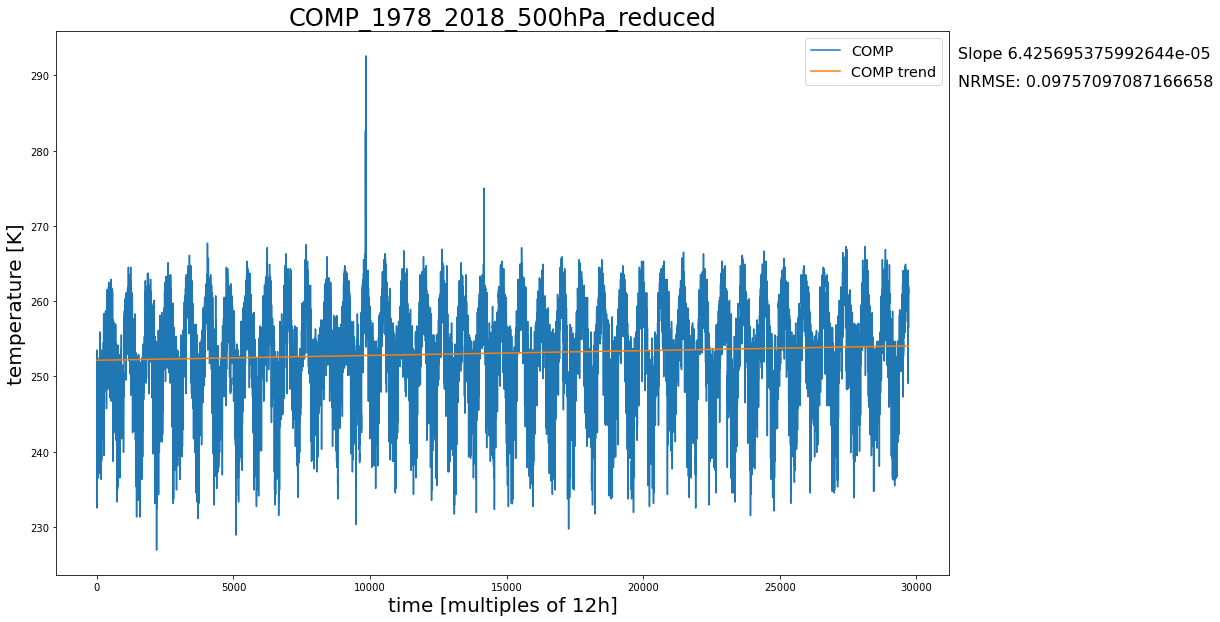

In [15]:
pltc_red = (pltc[pltc.time.dt.hour == 12].append(pltc[pltc.time.dt.hour == 0])).sort_values('time')

datlen = len(pltc_red.time)
selected = pltc_red.ta

coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
mse = residuals[0]/(datlen)
nrmse = np.sqrt(mse)/(selected.max() - selected.min())

fig, (ax1) = plt.subplots(1, 1)
ax1.plot(np.asarray(range(datlen)), np.asarray(selected), label = 'COMP')
ax1.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP_1978_2018_500hPa_reduced')
ax1.text(1.01, 0.95, 'Slope ' + str(coefficients[0]), transform=ax1.transAxes, fontsize = 16)
ax1.text(1.01, 0.90, 'NRMSE: ' + str(nrmse), transform=ax1.transAxes, fontsize = 16)
ax1.legend( loc='best')
plt.show()
plt.close(fig)

---

## Comparison:

In [23]:
igra_h_adjusted = []
comp_adjusted = []
preslist = [10000, 20000, 50000, 85000,]
for i in preslist:
    print('--- \npressure level: ' + str(i))
    datai = igra[igra.air_pressure == i]
    datai.report_timestamp = pandas.to_datetime(datai.report_timestamp, utc=True)
    datah = igrah[igrah.air_pressure == i]
    datah.report_timestamp = pandas.to_datetime(datah.report_timestamp, utc=True)
    datac = comp[comp.plev == i]
    datac.time = pandas.to_datetime(datac.time, utc=True)
    datar = (datac[datac.time.dt.hour == 12].append(datac[datac.time.dt.hour == 0])).sort_values('time')
    datar.time = pandas.to_datetime(datar.time, utc=True)
    print('Length of COMP: ' + str(len(datac.time)))
    print('Missing Values of COMP: ' + str(datac.ta.isnull().sum()))
    print('Length of reduced COMP: ' + str(len(datar.time)))
    print('Missing Values of COMP: ' + str(datar.ta.isnull().sum()))
    print('Length of IGRA: ' + str(len(datai.report_timestamp)))
    print('Missing Values of COMP: ' + str(datai.air_temperature.isnull().sum()))
    print('Length of IGRA_H: ' + str(len(datah.report_timestamp)))
    print('Missing Values of COMP: ' + str(datah.air_temperature.isnull().sum()))
    print('Length difference of reduced COMP to IGRA: ' + str(len(datar.time)-len(datai.report_timestamp)))
    print('Length difference of reduced COMP to IGRA_H: ' + str(len(datar.time)-len(datah.report_timestamp)))
    missingtimes1 = []
    for i in datar.time:
        if len(datah[datah.report_timestamp == i]) <1: # -> checking if timestamp is also in the other dataset
            missingtimes1.append(i)
            datar = datar[datar.time != i] # -> kicking it out, if not
    print('Missing Timestamps in IGRA_H relative to reduced COMP: ' + str(len(missingtimes1)))
    missingtimes2 = []
    toomanytimes2 = []
    for i in datah.report_timestamp:
        if len(datar[datar.time == i]) <1: # -> checking if timestamp is also in the other dataset
            missingtimes2.append(i)
            datah = datah[datah.report_timestamp != i] # -> kicking it out, if not
    print('Missing Timestamps in reduced COMP relative to IGRA_H: ' + str(len(missingtimes2)))
    comp_adjusted.append(datar)
    igra_h_adjusted.append(datah)

--- 
pressure level: 10000
Length of COMP: 46988
Missing Values of COMP: 0
Length of reduced COMP: 29678
Missing Values of COMP: 0
Length of IGRA: 29171
Missing Values of COMP: 0
Length of IGRA_H: 29171
Missing Values of COMP: 0
Length difference of reduced COMP to IGRA: 507
Length difference of reduced COMP to IGRA_H: 507


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 605
Missing Timestamps in reduced COMP relative to IGRA_H: 98
--- 
pressure level: 20000
Length of COMP: 47025
Missing Values of COMP: 0
Length of reduced COMP: 29667
Missing Values of COMP: 0
Length of IGRA: 29170
Missing Values of COMP: 0
Length of IGRA_H: 29170
Missing Values of COMP: 0
Length difference of reduced COMP to IGRA: 497
Length difference of reduced COMP to IGRA_H: 497


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 637
Missing Timestamps in reduced COMP relative to IGRA_H: 140
--- 
pressure level: 50000
Length of COMP: 47123
Missing Values of COMP: 0
Length of reduced COMP: 29714
Missing Values of COMP: 0
Length of IGRA: 29237
Missing Values of COMP: 0
Length of IGRA_H: 29237
Missing Values of COMP: 0
Length difference of reduced COMP to IGRA: 477
Length difference of reduced COMP to IGRA_H: 477


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 598
Missing Timestamps in reduced COMP relative to IGRA_H: 121
--- 
pressure level: 85000
Length of COMP: 47100
Missing Values of COMP: 0
Length of reduced COMP: 29703
Missing Values of COMP: 0
Length of IGRA: 29203
Missing Values of COMP: 0
Length of IGRA_H: 29203
Missing Values of COMP: 0
Length difference of reduced COMP to IGRA: 500
Length difference of reduced COMP to IGRA_H: 500


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 622
Missing Timestamps in reduced COMP relative to IGRA_H: 122


### There were some Values in both datasets, which were not in the other one. For further comparison we removed them all, so every dataset is equaly long and each timestamp is available in both.

### Now both datasets should have the same lenght, and we can plot them:

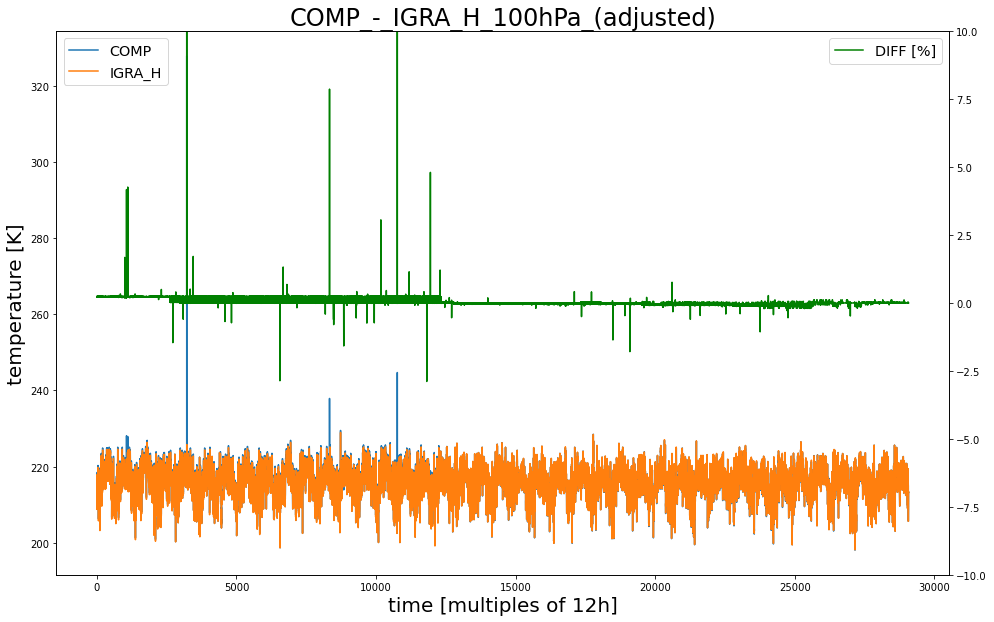

In [31]:
data1 = comp_adjusted[0]
data2 = igra_h_adjusted[0]

fig, (ax1) = plt.subplots(1, 1)

ax1.plot(np.asarray(range(len(data1.time))), np.asarray(data1.ta), label = 'COMP')
ax1.plot(np.asarray(range(len(data1.time))), np.asarray(data2.air_temperature), label = 'IGRA_H')
ax2 = ax1.twinx()
ax2.plot(np.asarray(range(len(data1.time))), (100. / np.asarray(data1.ta) * (np.asarray(data1.ta)-np.asarray(data2.air_temperature))), label = 'DIFF [%]', c='green')

ax2.set_ylim(-10,10)
ax2.legend(loc='best')

ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP_-_IGRA_H_100hPa_(adjusted)')
ax1.legend( loc='upper left')
plt.show()
plt.close(fig)

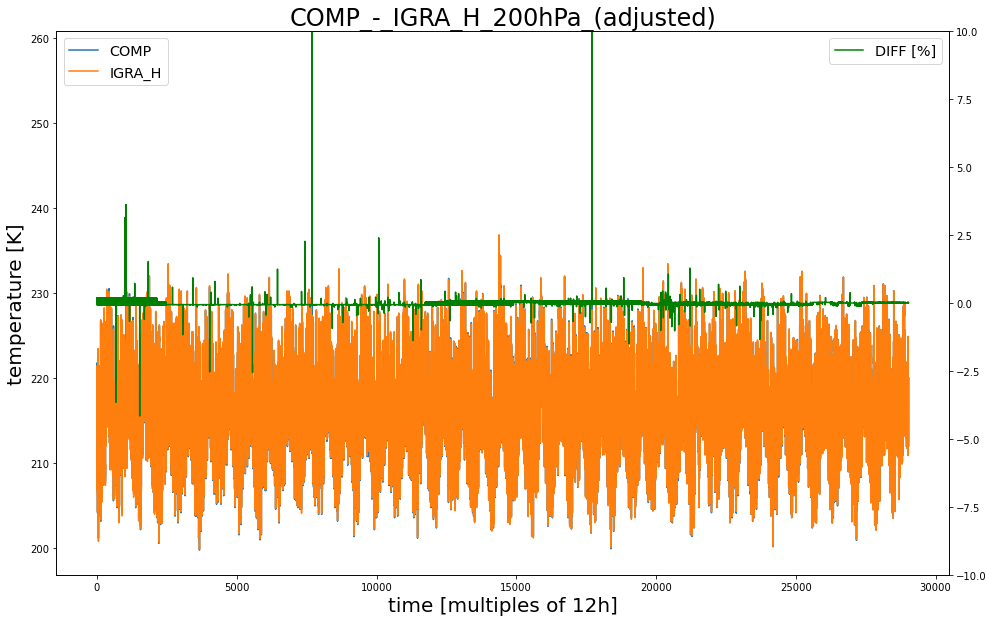

In [32]:
data1 = comp_adjusted[1]
data2 = igra_h_adjusted[1]

fig, (ax1) = plt.subplots(1, 1)

ax1.plot(np.asarray(range(len(data1.time))), np.asarray(data1.ta), label = 'COMP')
ax1.plot(np.asarray(range(len(data1.time))), np.asarray(data2.air_temperature), label = 'IGRA_H')
ax2 = ax1.twinx()
ax2.plot(np.asarray(range(len(data1.time))), (100. / np.asarray(data1.ta) * (np.asarray(data1.ta)-np.asarray(data2.air_temperature))), label = 'DIFF [%]', c='green')

ax2.set_ylim(-10,10)
ax2.legend(loc='best')

ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP_-_IGRA_H_200hPa_(adjusted)')
ax1.legend( loc='upper left')
plt.show()
plt.close(fig)

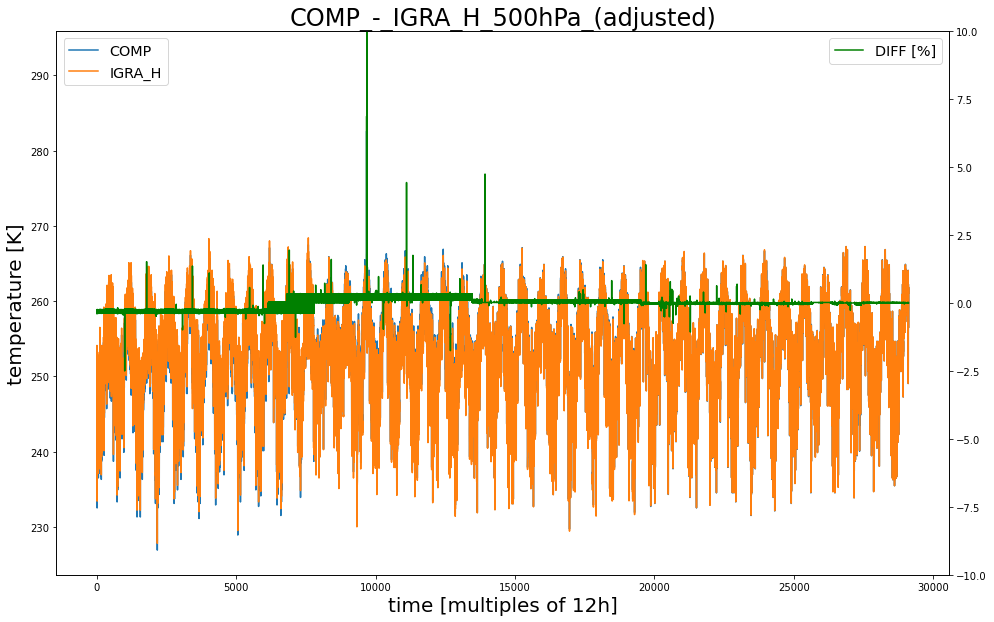

In [28]:
data1 = comp_adjusted[2]
data2 = igra_h_adjusted[2]

fig, (ax1) = plt.subplots(1, 1)

ax1.plot(np.asarray(range(len(data1.time))), np.asarray(data1.ta), label = 'COMP')
ax1.plot(np.asarray(range(len(data1.time))), np.asarray(data2.air_temperature), label = 'IGRA_H')
ax2 = ax1.twinx()
ax2.plot(np.asarray(range(len(data1.time))), (100. / np.asarray(data1.ta) * (np.asarray(data1.ta)-np.asarray(data2.air_temperature))), label = 'DIFF [%]', c='green')

ax2.set_ylim(-10,10)
ax2.legend(loc='best')

ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP_-_IGRA_H_500hPa_(adjusted)')
ax1.legend( loc='upper left')
plt.show()
plt.close(fig)

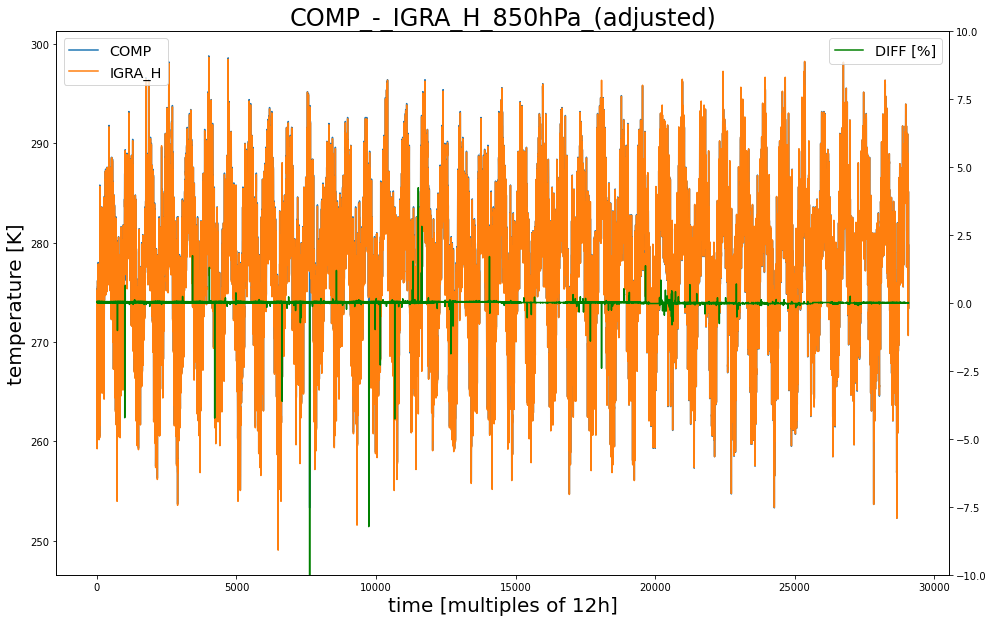

In [33]:
data1 = comp_adjusted[3]
data2 = igra_h_adjusted[3]

fig, (ax1) = plt.subplots(1, 1)

ax1.plot(np.asarray(range(len(data1.time))), np.asarray(data1.ta), label = 'COMP')
ax1.plot(np.asarray(range(len(data1.time))), np.asarray(data2.air_temperature), label = 'IGRA_H')
ax2 = ax1.twinx()
ax2.plot(np.asarray(range(len(data1.time))), (100. / np.asarray(data1.ta) * (np.asarray(data1.ta)-np.asarray(data2.air_temperature))), label = 'DIFF [%]', c='green')

ax2.set_ylim(-10,10)
ax2.legend(loc='best')

ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP_-_IGRA_H_850hPa_(adjusted)')
ax1.legend( loc='upper left')
plt.show()
plt.close(fig)

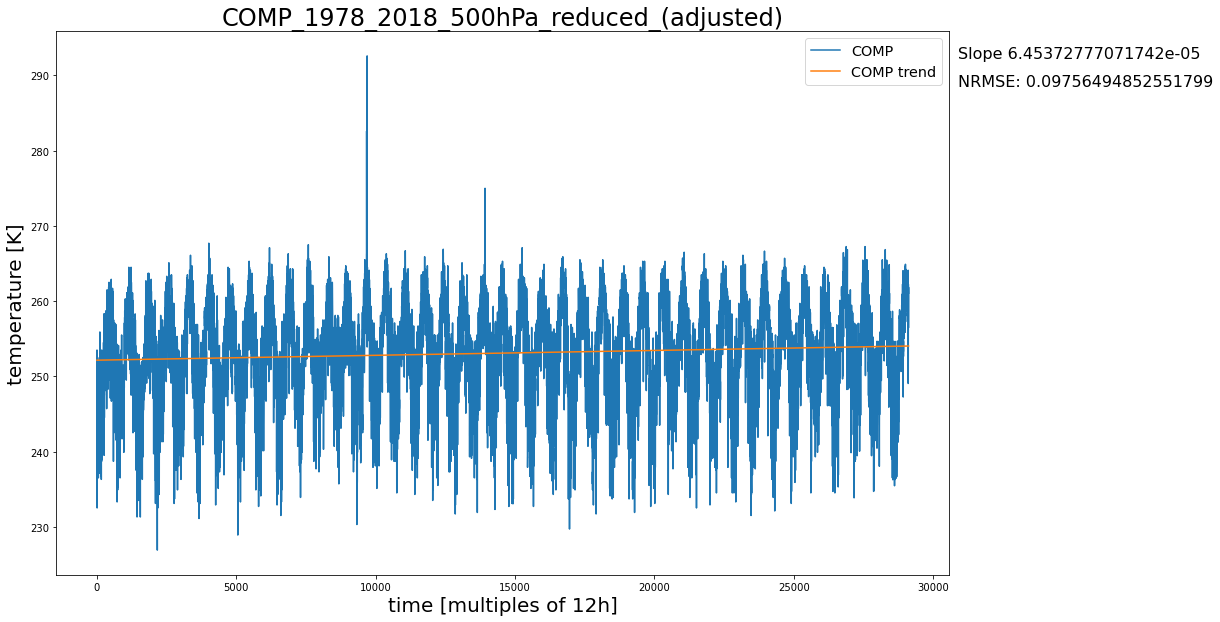

In [29]:
datlen = len(data1.time)
selected = data1.ta

coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
mse = residuals[0]/(datlen)
nrmse = np.sqrt(mse)/(selected.max() - selected.min())

fig, (ax1) = plt.subplots(1, 1)
ax1.plot(np.asarray(range(datlen)), np.asarray(selected), label = 'COMP')
ax1.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP_1978_2018_500hPa_reduced_(adjusted)')
ax1.text(1.01, 0.95, 'Slope ' + str(coefficients[0]), transform=ax1.transAxes, fontsize = 16)
ax1.text(1.01, 0.90, 'NRMSE: ' + str(nrmse), transform=ax1.transAxes, fontsize = 16)
ax1.legend( loc='best')
plt.show()
plt.close(fig)

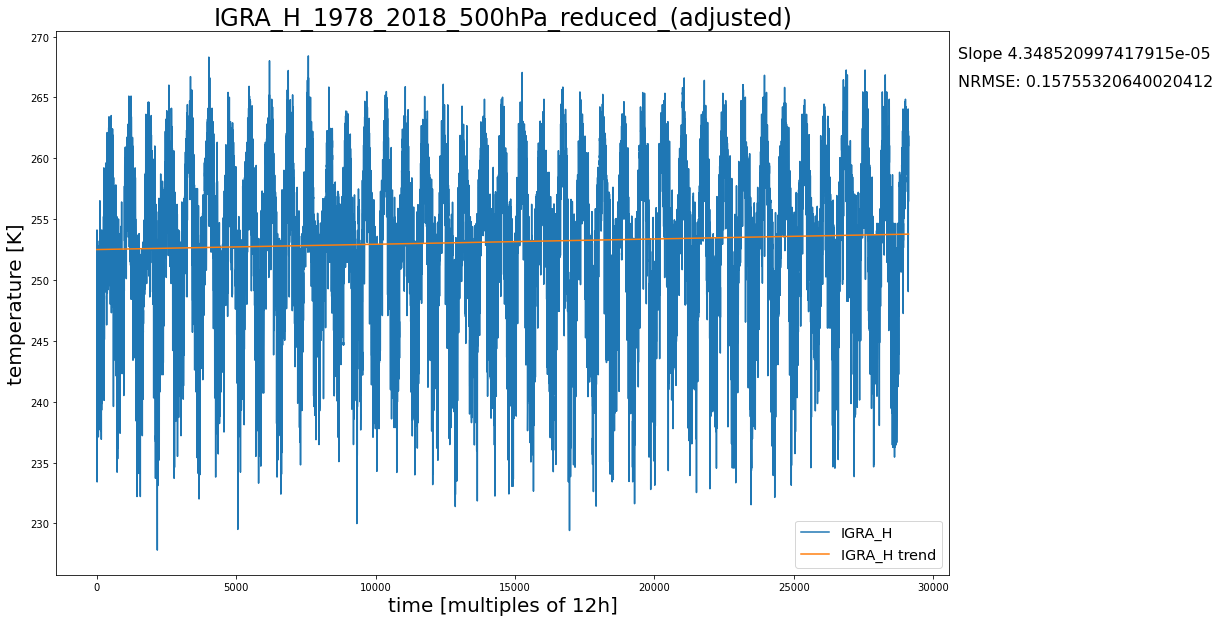

In [30]:
datlen = len(data2.report_timestamp)
selected = data2.air_temperature

coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
mse = residuals[0]/(datlen)
nrmse = np.sqrt(mse)/(selected.max() - selected.min())

fig, (ax1) = plt.subplots(1, 1)
ax1.plot(np.asarray(range(datlen)), np.asarray(selected), label = 'IGRA_H')
ax1.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H_1978_2018_500hPa_reduced_(adjusted)')
ax1.text(1.01, 0.95, 'Slope ' + str(coefficients[0]), transform=ax1.transAxes, fontsize = 16)
ax1.text(1.01, 0.90, 'NRMSE: ' + str(nrmse), transform=ax1.transAxes, fontsize = 16)
ax1.legend( loc='best')
plt.show()
plt.close(fig)